### Problem 1
Objective:
Using the Lahman Batting dataset, We aim to compare player batting performance during two significant periods in baseball history:
- The Steroid Era (1994–2005)
- The Recent Era (2012–2023)

We'll use key batting statistics—Hits (H), At-Bats (AB), Home Runs (HR)—and calculate Batting Average (BA) to visualize and analyze player performance across the eras.

#### Step 1: Load Required Libraries and Dataset
- We start by importing necessary Python libraries for data manipulation (pandas, numpy) and visualization (matplotlib, seaborn).
- We load the Batting.csv file from the Lahman database.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [4]:
# Set the file path
file_path = r"C:\Users\ASUS\Downloads\lahman_1871-2023_csv\lahman_1871-2023_csv\Batting.csv"
# Read the CSV file
batting_df= pd.read_csv(file_path)
# Display the rows
batting_df

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,aardsda01,2006,1,CHN,NL,45,NaN,2,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2,aardsda01,2007,1,CHA,AL,25,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,aardsda01,2008,1,BOS,AL,47,NaN,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
4,aardsda01,2009,1,SEA,AL,73,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113794,zwilldu01,1915,1,CHF,FL,150,NaN,548,65,157,32,7,13,94.0,24.0,NaN,67,65.0,NaN,2.0,18.0,NaN,NaN,NaN
113795,zwilldu01,1916,1,CHN,NL,35,NaN,53,4,6,1,0,1,8.0,0.0,NaN,4,6.0,NaN,0.0,2.0,NaN,NaN,NaN
113796,zychto01,2015,1,SEA,AL,13,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
113797,zychto01,2016,1,SEA,AL,12,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


#### Step 2: Data Cleaning & Preparation
2.1 Check for Duplicate Records Based on Player, Year, and Team
E
e remove duplicate rows by considering a combination of:
- playerID: Unique player identifier
- yearID: The season year
- teamID: The team the player was associated with in that year

It accounts for scenarios where a player may have played for multiple teams within the same season. By doing this, we prevent duplicate aggregations for players who switched teams mid-season.

In [6]:
batting_df = batting_df.drop_duplicates(subset=['playerID', 'yearID', 'teamID'])
batting_df

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,aardsda01,2006,1,CHN,NL,45,NaN,2,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2,aardsda01,2007,1,CHA,AL,25,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,aardsda01,2008,1,BOS,AL,47,NaN,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
4,aardsda01,2009,1,SEA,AL,73,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113794,zwilldu01,1915,1,CHF,FL,150,NaN,548,65,157,32,7,13,94.0,24.0,NaN,67,65.0,NaN,2.0,18.0,NaN,NaN,NaN
113795,zwilldu01,1916,1,CHN,NL,35,NaN,53,4,6,1,0,1,8.0,0.0,NaN,4,6.0,NaN,0.0,2.0,NaN,NaN,NaN
113796,zychto01,2015,1,SEA,AL,13,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
113797,zychto01,2016,1,SEA,AL,12,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


2.2 Select Relevant Columns

We ensure that essential columns for analysis exist in the dataset. These include:
- yearID: Season year
- AB: At-bats
- H: Hits
- HR: Home runs
- playerID: Unique player identifier

If any required columns are missing, We raise an error.

In [8]:
# Make sure required columns exist
required_columns = ['yearID', 'AB', 'H', 'HR', 'playerID']
missing = [col for col in required_columns if col not in batting_df.columns]
if missing:
    raise KeyError(f"Missing required columns: {missing}")

In [9]:
batting_df = batting_df[required_columns]
batting_df

,yearID,AB,H,HR,playerID
0,2004,0,0,0,aardsda01
1,2006,2,0,0,aardsda01
2,2007,0,0,0,aardsda01
3,2008,1,0,0,aardsda01
4,2009,0,0,0,aardsda01
...,...,...,...,...,...
113794,1915,548,157,13,zwilldu01
113795,1916,53,6,1,zwilldu01
113796,2015,0,0,0,zychto01
113797,2016,0,0,0,zychto01


In [10]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113721 entries, 0 to 113798
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   yearID    113721 non-null  int64 
 1   AB        113721 non-null  int64 
 2   H         113721 non-null  int64 
 3   HR        113721 non-null  int64 
 4   playerID  113721 non-null  object
dtypes: int64(4), object(1)
memory usage: 5.2+ MB


2.3 Filter Out Low-Participation Players
- I exclude players with fewer than 50 at-bats in a season to reduce statistical noise and focus on regular contributors.

In [12]:
batting_df = batting_df[batting_df['AB'] >= 50].copy()

2.4 Calculate Batting Average (BA)
- We compute Batting Average (BA), a key measure of player performance: BA = Hits / At-Bats

In [14]:
batting_df['BA'] = batting_df['H'] / batting_df['AB']
batting_df

,yearID,AB,H,HR,playerID,BA
9,1954,468,131,13,aaronha01,0.279915
10,1955,602,189,27,aaronha01,0.313953
11,1956,609,200,26,aaronha01,0.328407
12,1957,615,198,44,aaronha01,0.321951
13,1958,601,196,30,aaronha01,0.326123
...,...,...,...,...,...,...
113785,1954,64,8,0,zuverge01,0.125000
113792,1910,87,16,0,zwilldu01,0.183908
113793,1914,592,185,16,zwilldu01,0.312500
113794,1915,548,157,13,zwilldu01,0.286496


#### Step 3: Create Era-Based Subsets
We segment the dataset into two eras:
- Steroid Era: 1994–2005
- Recent Era: 2012–2023

These ranges reflect different policy environments around performance-enhancing drug use and modern baseball strategies.

In [16]:
steroid_era = batting_df[(batting_df['yearID'] >= 1994) & (batting_df['yearID'] <= 2005)].copy()
steroid_era

,yearID,AB,H,HR,playerID,BA
111,1998,244,68,12,abbotje01,0.278689
112,1999,57,9,2,abbotje01,0.157895
113,2000,215,59,3,abbotje01,0.274419
127,1994,345,86,9,abbotku01,0.249275
128,1995,420,107,17,abbotku01,0.254762
...,...,...,...,...,...,...
113628,2005,58,23,0,zimmery01,0.396552
113742,1996,91,23,1,zuberjo01,0.252747
113746,2000,68,20,3,zuletju01,0.294118
113747,2001,106,23,6,zuletju01,0.216981


In [17]:
recent_era = batting_df[(batting_df['yearID'] >= 2012) & (batting_df['yearID'] <= 2023)].copy()
recent_era

,yearID,AB,H,HR,playerID,BA
216,2022,125,29,2,abramcj01,0.232000
217,2022,159,41,0,abramcj01,0.257862
218,2023,563,138,18,abramcj01,0.245115
245,2012,195,48,3,abreubo01,0.246154
246,2014,133,33,1,abreubo01,0.248120
...,...,...,...,...,...,...
113760,2019,266,44,9,zuninmi01,0.165414
113761,2020,75,11,4,zuninmi01,0.146667
113762,2021,333,72,33,zuninmi01,0.216216
113763,2022,115,17,5,zuninmi01,0.147826


#### Step 4: Label and Combine Era Data
We add a new column (Era) to label each record with its corresponding era, and then combine both subsets into one dataframe for analysis.

In [19]:
steroid_era['Era'] = 'Steroid Era (1994–2005)'
recent_era['Era'] = 'Recent Era (2012–2023)'

In [20]:
combined = pd.concat([steroid_era, recent_era])
combined

,yearID,AB,H,HR,playerID,BA,Era
111,1998,244,68,12,abbotje01,0.278689,Steroid Era (1994–2005)
112,1999,57,9,2,abbotje01,0.157895,Steroid Era (1994–2005)
113,2000,215,59,3,abbotje01,0.274419,Steroid Era (1994–2005)
127,1994,345,86,9,abbotku01,0.249275,Steroid Era (1994–2005)
128,1995,420,107,17,abbotku01,0.254762,Steroid Era (1994–2005)
...,...,...,...,...,...,...,...
113760,2019,266,44,9,zuninmi01,0.165414,Recent Era (2012–2023)
113761,2020,75,11,4,zuninmi01,0.146667,Recent Era (2012–2023)
113762,2021,333,72,33,zuninmi01,0.216216,Recent Era (2012–2023)
113763,2022,115,17,5,zuninmi01,0.147826,Recent Era (2012–2023)


#### Step 5: Reshape Data for Time-Series Comparison
We reshape the data to wide format to analyze annual trends for each player. This structure allows for:
- Cross-year comparisons
- Temporal performance tracking
- Easier visualization and statistical modeling

Each statistic (H, HR, AB, BA) is now organized by year for every player, enabling longitudinal analysis.

In [22]:
wide_format = combined.pivot_table(
    index='playerID', 
    columns='yearID', 
    values=['H', 'HR', 'AB', 'BA']
)
wide_format

AB                                                          \
yearID      1994   1995   1996   1997   1998   1999   2000   2001   2002   
playerID                                                                   
abbotje01    NaN    NaN    NaN    NaN  244.0   57.0  215.0    NaN    NaN   
abbotku01  345.0  420.0  320.0  252.0   97.0  286.0  157.0    NaN    NaN   
abernbr01    NaN    NaN    NaN    NaN    NaN    NaN    NaN  304.0  463.0   
abramcj01    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
abreubo01    NaN    NaN    NaN  188.0  497.0  546.0  576.0  588.0  572.0   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
zobribe01    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
zuberjo01    NaN    NaN   91.0    NaN    NaN    NaN    NaN    NaN    NaN   
zuletju01    NaN    NaN    NaN    NaN    NaN    NaN   68.0  106.0    NaN   
zuninmi01    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
zupcibo01   88.0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                                          \
yearID      2003   2004   2005   2012   2013   2014   2015   2016   2017   
playerID                                                                   
abbotje01    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
abbotku01    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
abernbr01    NaN    NaN   67.0    NaN    NaN    NaN    NaN    NaN    NaN   
abramcj01    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
abreubo01  577.0  574.0  588.0  195.0    NaN  133.0    NaN    NaN    NaN   
...          ...    ...    ...    ...    ...    ...    ...    ...    ...   
zobribe01    NaN    NaN    NaN  560.0  612.0  570.0  233.5  523.0  435.0   
zuberjo01    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
zuletju01    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
zuninmi01    NaN    NaN    NaN    NaN  173.0  438.0  350.0  164.0  387.0   
zupcibo01    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                                                          BA            \
yearID      2018   2019  2020   2021   2022   2023      1994      1995   
playerID                                                                 
abbotje01    NaN    NaN   NaN    NaN    NaN    NaN       NaN       NaN   
abbotku01    NaN    NaN   NaN    NaN    NaN    NaN  0.249275  0.254762   
abernbr01    NaN    NaN   NaN    NaN    NaN    NaN       NaN       NaN   
abramcj01    NaN    NaN   NaN    NaN  142.0  563.0       NaN       NaN   
abreubo01    NaN    NaN   NaN    NaN    NaN    NaN       NaN       NaN   
...          ...    ...   ...    ...    ...    ...       ...       ...   
zobribe01  455.0  150.0   NaN    NaN    NaN    NaN       NaN       NaN   
zuberjo01    NaN    NaN   NaN    NaN    NaN    NaN       NaN       NaN   
zuletju01    NaN    NaN   NaN    NaN    NaN    NaN       NaN       NaN   
zuninmi01  373.0  266.0  75.0  333.0  115.0  124.0       NaN       NaN   
zupcibo01    NaN    NaN   NaN    NaN    NaN    NaN  0.204545       NaN   

                                                                      \
yearID         1996     1997      1998      1999      2000      2001   
playerID                                                               
abbotje01       NaN      NaN  0.278689  0.157895  0.274419       NaN   
abbotku01  0.253125  0.27381  0.260907  0.272727  0.216561       NaN   
abernbr01       NaN      NaN       NaN       NaN       NaN  0.269737   
abramcj01       NaN      NaN       NaN       NaN       NaN       NaN   
abreubo01       NaN  0.25000  0.311871  0.335165  0.315972  0.289116   
...             ...      ...       ...       ...       ...       ...   
zobribe01       NaN      NaN       NaN       NaN       NaN       NaN   
zuberjo01  0.252747      NaN       NaN       NaN       NaN       NaN   
zuletju01       NaN      NaN       NaN       NaN  0.294

#### Step 6: Visualizing Player Performance Metrics Across Eras
To compare player performance between the Steroid Era and the Recent Era, we visualize the distribution and central tendency of key batting statistics:
- Batting Average (BA)
- Hits (H)
- Home Runs (HR)
- At-Bats (AB)

We use Seaborn’s histplot() with:
- kde=True: Adds a Kernel Density Estimation curve for smoother insights.
- element='step': Uses unfilled line-style bars for easier comparison.
- hue='Era': Color-coded by era for side-by-side visual comparisons.
- stat='density': Ensures the area under each curve sums to 1, making the shapes directly comparable regardless of sample size.

6.1 Histograms with KDE – Distribution Comparison
This view helps reveal changes in performance distributions, such as shifts in average values, spread, or skewness (e.g., whether they counts were more extreme in one era).

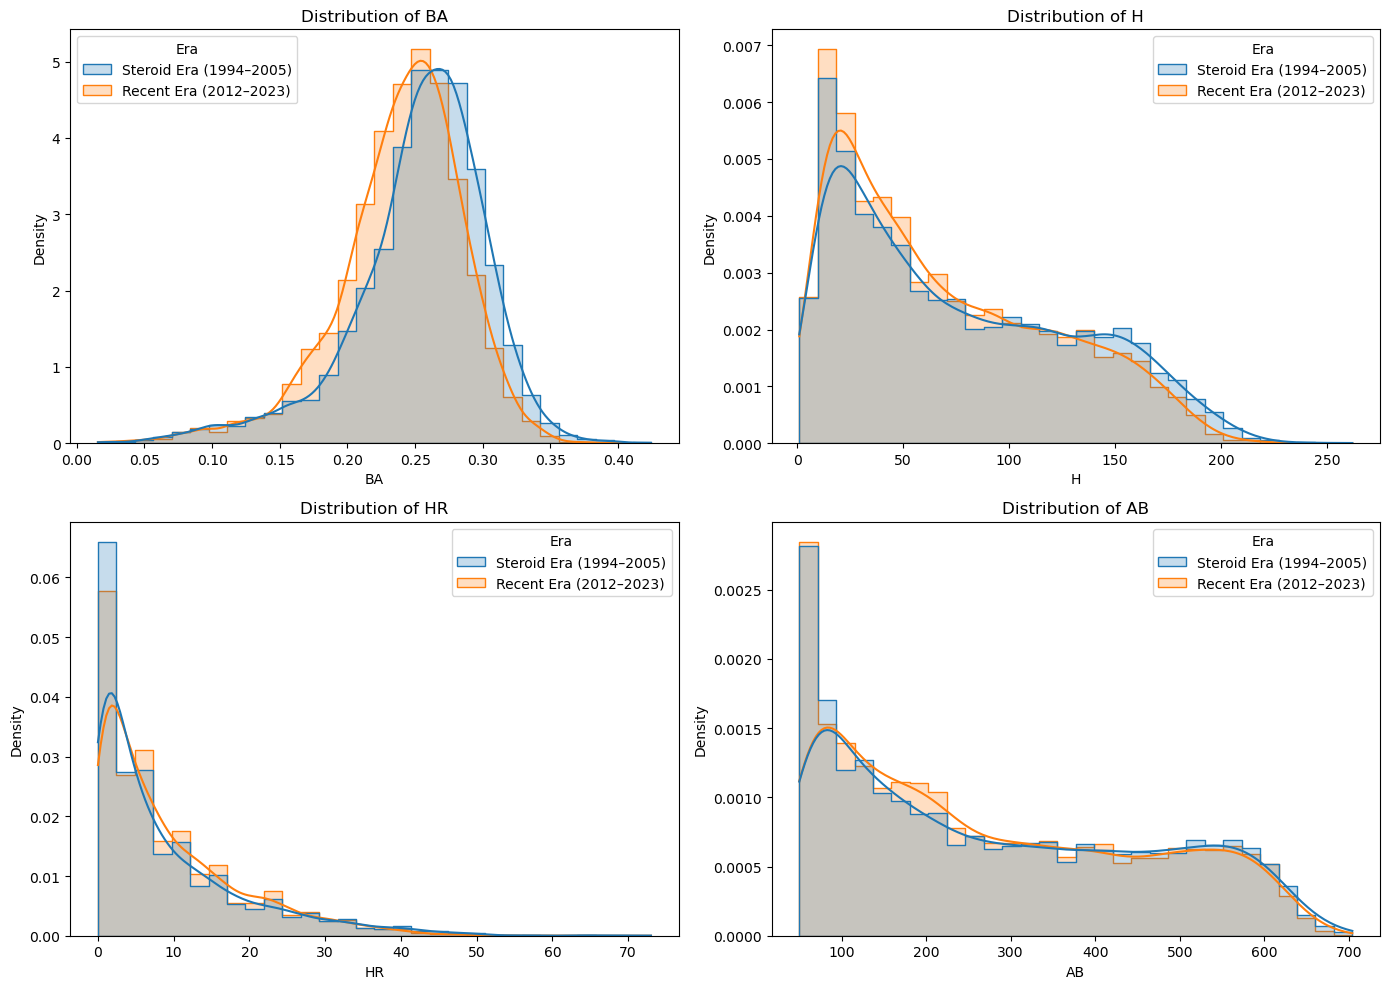

In [24]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(['BA', 'H', 'HR','AB']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(data=combined, x=col, hue='Era', kde=True, bins=30, element='step', stat='density')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Each subplot above represents the distribution of a batting metric, separated by era. Key takeaways:

Batting Average (BA)
- Both eras exhibit a roughly normal distribution, centered around .25.
- The Steroid Era shows a slightly higher central tendency, with a heavier tail toward higher BA values.
- The Recent Era appears more symmetrical and tighter around the median.

Hits (H)
- Distributions are right-skewed in both eras.
- The Steroid Era has a slightly longer tail, indicating more players with high hit counts.
- The Recent Era shows a steeper drop-off, suggesting fewer extreme performances.

Home Runs (HR)
- Both distributions are positively skewed, with long tails.
- The Steroid Era has more frequent higher HR values, supporting anecdotal evidence about enhanced power hitting during that period.

At-Bats (AB)
- Similar right-skewed distribution in both eras.
- The Steroid Era shows a slightly broader distribution, with more players having a higher number of ABs — possibly due to longer tenures or reduced rotation.

6.2 Boxplots – Summary of Central Tendency and Spread
We visualize the spread and outliers using boxplots for each statistic:
- Boxes represent interquartile range (IQR)
- Horizontal line shows the median
- Whiskers and points highlight outliers and distribution tails

Boxplots are especially useful for identifying differences in medians, presence of extreme values, and overall variance across eras.

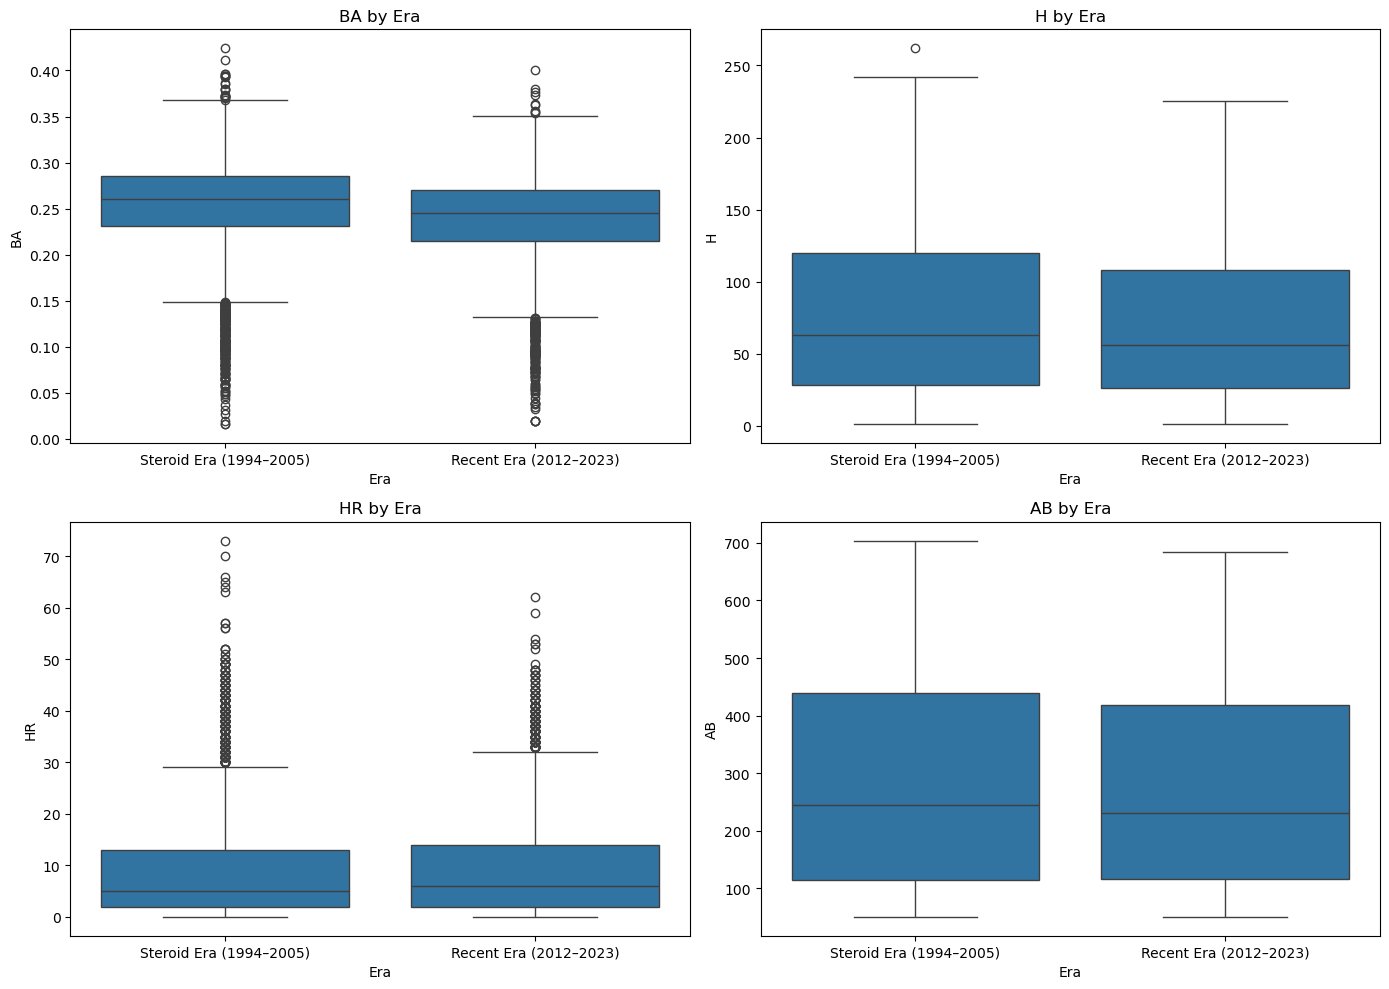

In [27]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(['BA', 'H', 'HR','AB']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(data=combined, x='Era', y=col)
    plt.title(f'{col} by Era')
plt.tight_layout()
plt.show()

The boxplots visualize median, IQR, and outliers for each batting metric by era.

BA:
- Median BA is marginally higher in the Steroid Era.
- Both eras show similar IQR and range, with many outliers in both directions.

Hits & AB:
- Medians are slightly higher in the Steroid Era.
- Wider spread in the Steroid Era, suggesting more variability.

Home Runs (HR):
- Similar median, but the Steroid Era has more extreme outliers — aligns with historical context around power hitting.

We generate summary statistics for BA, H, and HR across both eras:
- mean: Average performance
- min / max: Performance bounds
- std: Standard deviation (spread/variability)
- median: Central value

This quantitative snapshot gives us a numerical basis to support or challenge visual findings.

Why exclude AB?
It is often more useful to normalize performance (e.g., BA = H/AB) than to compare AB directly, as it reflects opportunity more than efficiency.

In [30]:
summary_stats = combined.groupby('Era')[['BA', 'H', 'HR']].agg(['mean', 'min', 'max', 'std', 'median'])
summary_stats = summary_stats.round(2)
summary_stats

BA                               H                 \
                         mean   min   max   std median   mean min  max   std   
Era                                                                            
Recent Era (2012–2023)   0.24  0.02  0.40  0.05   0.25  69.70   1  225  50.4   
Steroid Era (1994–2005)  0.25  0.02  0.42  0.05   0.26  76.12   1  262  54.8   

                                  HR                        
                        median  mean min max    std median  
Era                                                         
Recent Era (2012–2023)    56.0  9.30   0  62   9.33    6.0  
Steroid Era (1994–2005)   63.0  9.04   0  73  10.17    5.0

BA is marginally higher in the Steroid Era, but variability (std) is similar.

Hits were slightly more common and extreme in the Steroid Era.

Home Runs have similar means, but more extreme outliers in the Steroid Era, suggesting standout sluggers.

#### Conclusion :
This exploratory analysis supports the hypothesis that:

The Steroid Era may have featured more power hitters, higher volume of hits, and a marginally better BA.

However, overall central tendencies are not drastically different, suggesting modern players may be performing similarly — possibly due to advances in training, analytics, and strategy.

The shape of the distributions, particularly for HR and H, reveals subtle but telling shifts in player performance profiles.

### Problem 2
Objective: Analyze the performance of Major League Baseball (MLB) players who were named in the Mitchell Report, which investigated the use of performance-enhancing drugs (PEDs), specifically steroids, in professional baseball.

We'll compare the batting performance of players mentioned in the Mitchell Report to those not mentioned, focusing on Batting Average (BA) and Home Runs (HR) for the seasons between 1994 and 2005.

#### Step 1: Scraping the Mitchell Report Player List from Wikipedia
We first fetch and parse the HTML content of the Mitchell Report Wikipedia page to extract the list of players.

In [35]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Fetch the webpage content
url = "https://en.wikipedia.org/wiki/List_of_Major_League_Baseball_players_named_in_the_Mitchell_Report"
response = requests.get(url)
response.raise_for_status()

In [36]:
# Parse the HTML content
soup = BeautifulSoup(response.text, 'html.parser')

In [37]:
# Find all tables in the page
tables = soup.find_all('table', {'class': 'wikitable'})

In [38]:
mitchell_players = []

for table in tables:
    for row in table.find_all("tr")[1:]:
        cols = row.find_all("td")
        if cols:
            name = cols[0].get_text(strip=True)
            mitchell_players.append(name)

mitchell_df= pd.DataFrame(mitchell_players, columns=["name"])
mitchell_df = mitchell_df.sort_values(by="name", ascending=True).reset_index(drop=True)
mitchell_df


,name
0,Active at the time of the report
1,Adam Piatt*
2,Adam Riggs
3,Alex Cabrera
4,Andy Pettitte
...,...
83,Todd Pratt
84,Todd Williams
85,Troy Glaus
86,Wally Joyner


#### Step 2: Cleaning Player Names from the Mitchell Report
To match names from the Mitchell Report with the Lahman dataset, we need to clean and normalize them. This includes removing accents, punctuation, and inconsistent spacing.

In [40]:
# import unidecode
# mitchell_df["name"] = mitchell_df["name"].dropna().str.strip().str.title()
# mitchell_df["name"] = mitchell_df["name"].apply(lambda x: unidecode.unidecode(x))
# mitchell_df["name"] = mitchell_df["name"].str.replace(r'[^a-zA-Z\s]', '', regex=True)
mitchell_df = mitchell_df.drop_duplicates(subset=["name"]).reset_index(drop=True)
mitchell_df

,name
0,Active at the time of the report
1,Adam Piatt*
2,Adam Riggs
3,Alex Cabrera
4,Andy Pettitte
...,...
81,Todd Pratt
82,Todd Williams
83,Troy Glaus
84,Wally Joyner


Check for missing values and data types

In [42]:
print("\nNaN (missing) value count per column:")
mitchell_df.isna().sum()


NaN (missing) value count per column:


name    0
dtype: int64

In [43]:
print("\nData types of each column:")
print(mitchell_df.dtypes)


Data types of each column:
name    object
dtype: object


#### Step 3: Loading the Lahman People Dataset
We load the People.csv file from the Lahman dataset to get player IDs and match them with names from the Mitchell Report.

In [45]:
# Set the file path
file_path = r"People.csv"
# Read the CSV file
people = pd.read_csv(file_path, encoding='latin1')
# Display the rows
people

,ID,playerID,birthYear,birthMonth,birthDay,birthCity,birthCountry,birthState,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,bbrefID,finalGame,retroID
0,1,aardsda01,1981.0,12.0,27.0,Denver,USA,CO,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,aardsda01,2015-08-23,aardd001
1,2,aaronha01,1934.0,2.0,5.0,Mobile,USA,AL,2021.0,1.0,22.0,USA,GA,Atlanta,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,aaronha01,1976-10-03,aaroh101
2,3,aaronto01,1939.0,8.0,5.0,Mobile,USA,AL,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,aaronto01,1971-09-26,aarot101
3,4,aasedo01,1954.0,9.0,8.0,Orange,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,aasedo01,1990-10-03,aased001
4,5,abadan01,1972.0,8.0,25.0,Palm Beach,USA,FL,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,abadan01,2006-04-13,abada001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21005,21006,paysojo99,1903.0,2.0,5.0,New York,USA,NY,1975.0,10.0,4.0,New York,USA,NY,Joan,Payson,Joan Whitney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21006,21007,galbrjo99,1897.0,8.0,10.0,Derby,USA,OH,1988.0,7.0,20.0,Galloway,USA,OH,John,Galbreath,John Wilmer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21007,21008,mcshejo99,1944.0,9.0,11.0,Bronx,USA,NY,1996.0,4.0,1.0,Cincinnati,USA,OH,John,McSherry,John Patrick,351.0,75.0,NaN,NaN,NaN,NaN,NaN,mcshj901
21008,21009,weyerle99,1936.0,9.0,3.0,Imlay City,USA,MI,1988.0,7.0,4.0,San Mateo,USA,CA,Lee,Weyer,Lee Howard,258.0,78.0,NaN,NaN,NaN,NaN,NaN,weyel901


In [46]:
people["name"] = people["nameFirst"] + " " + people["nameLast"]
people

,ID,playerID,birthYear,birthMonth,birthDay,birthCity,birthCountry,birthState,deathYear,deathMonth,deathDay,deathCountry,deathState,deathCity,nameFirst,nameLast,nameGiven,weight,height,bats,throws,debut,bbrefID,finalGame,retroID,name
0,1,aardsda01,1981.0,12.0,27.0,Denver,USA,CO,NaN,NaN,NaN,NaN,NaN,NaN,David,Aardsma,David Allan,215.0,75.0,R,R,2004-04-06,aardsda01,2015-08-23,aardd001,David Aardsma
1,2,aaronha01,1934.0,2.0,5.0,Mobile,USA,AL,2021.0,1.0,22.0,USA,GA,Atlanta,Hank,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,aaronha01,1976-10-03,aaroh101,Hank Aaron
2,3,aaronto01,1939.0,8.0,5.0,Mobile,USA,AL,1984.0,8.0,16.0,USA,GA,Atlanta,Tommie,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,aaronto01,1971-09-26,aarot101,Tommie Aaron
3,4,aasedo01,1954.0,9.0,8.0,Orange,USA,CA,NaN,NaN,NaN,NaN,NaN,NaN,Don,Aase,Donald William,190.0,75.0,R,R,1977-07-26,aasedo01,1990-10-03,aased001,Don Aase
4,5,abadan01,1972.0,8.0,25.0,Palm Beach,USA,FL,NaN,NaN,NaN,NaN,NaN,NaN,Andy,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,abadan01,2006-04-13,abada001,Andy Abad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21005,21006,paysojo99,1903.0,2.0,5.0,New York,USA,NY,1975.0,10.0,4.0,New York,USA,NY,Joan,Payson,Joan Whitney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Joan Payson
21006,21007,galbrjo99,1897.0,8.0,10.0,Derby,USA,OH,1988.0,7.0,20.0,Galloway,USA,OH,John,Galbreath,John Wilmer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,John Galbreath
21007,21008,mcshejo99,1944.0,9.0,11.0,Bronx,USA,NY,1996.0,4.0,1.0,Cincinnati,USA,OH,John,McSherry,John Patrick,351.0,75.0,NaN,NaN,NaN,NaN,NaN,mcshj901,John McSherry
21008,21009,weyerle99,1936.0,9.0,3.0,Imlay City,USA,MI,1988.0,7.0,4.0,San Mateo,USA,CA,Lee,Weyer,Lee Howard,258.0,78.0,NaN,NaN,NaN,NaN,NaN,weyel901,Lee Weyer


In [47]:
mitchell_players_clean = mitchell_df.copy()
mitchell_players_clean

,name
0,Active at the time of the report
1,Adam Piatt*
2,Adam Riggs
3,Alex Cabrera
4,Andy Pettitte
...,...
81,Todd Pratt
82,Todd Williams
83,Troy Glaus
84,Wally Joyner


#### Step 4: Fuzzy Matching for Name Alignment

Due to name formatting inconsistencies, we use fuzzy matching (token sort ratio) to identify close matches between Mitchell Report names and those in the People dataset.

In [49]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

# Create a list of player names from People dataset
people_names = people["name"].tolist()

# Dictionary to store best matches
best_matches = {}

# Loop through Mitchell Report names
for name in mitchell_df["name"]:
    match, score = process.extractOne(name, people_names, scorer=fuzz.token_sort_ratio)
    best_matches[name] = (match, score)

# Show potential mismatches (score < 90)
manual_fixes_candidates = {k: v[0] for k, v in best_matches.items() if v[1] < 90}

# Print mismatched ones
print("🔍 Possible Manual Fixes Needed:\n")
for wrong_name, correct_name in manual_fixes_candidates.items():
    print(f'"{wrong_name}": "{correct_name}"')

# Optional: assign this to manual_fixes if confirmed
manual_fixes = manual_fixes_candidates

🔍 Possible Manual Fixes Needed:

"Active at the time of the report": "Matthew Liberatore"
"Daniel Naulty": "Dan Naulty"
"Stephen Randolph": "Steve Randolph"
"Éric Gagné": "Rich Gedman"


#### Step 5: Manual Fixes for Known Mismatches
A few names (typically 3–4) require manual correction. We apply known mappings based on visual inspection and domain knowledge.

In [51]:
manual_fixes = {
    "Active at the time of the report": "Matthew Liberatore",
    "Stephen Randolph": "Steve Randolph",
    "Daniel Naulty": "Dan Naulty",
    "Éric Gagné": "Rich Gedman"
}
mitchell_players_clean["name"] = mitchell_players_clean["name"].replace(manual_fixes)
mitchell_players_clean

,name
0,Matthew Liberatore
1,Adam Piatt*
2,Adam Riggs
3,Alex Cabrera
4,Andy Pettitte
...,...
81,Todd Pratt
82,Todd Williams
83,Troy Glaus
84,Wally Joyner


In [52]:
import re

# Membersihkan karakter tidak diinginkan dari kolom 'name'
mitchell_players_clean["name"] = mitchell_players_clean["name"].str.replace(r"[^\w\s'-]", "", regex=True).str.strip()

# Terapkan manual fixes setelah pembersihan
mitchell_players_clean["name"] = mitchell_players_clean["name"].replace(manual_fixes)

mitchell_players_clean


,name
0,Matthew Liberatore
1,Adam Piatt
2,Adam Riggs
3,Alex Cabrera
4,Andy Pettitte
...,...
81,Todd Pratt
82,Todd Williams
83,Troy Glaus
84,Wally Joyner


#### Step 6: Merging Mitchell Report Names with Player IDs
We merge the cleaned Mitchell Report names with the Lahman People dataset to extract the corresponding playerID, which is used to join with the Batting dataset.

In [54]:
# Merge to get playerIDs
mitchell_players_merged = pd.merge(mitchell_players_clean, people[["playerID", "name"]], on="name", how="left")
mitchell_players_merged["in_mitchell_report"] = True

In [55]:
mitchell_ids = mitchell_players_merged["playerID"].dropna().unique()
mitchell_ids

array(['liberma01', 'piattad01', 'riggsad01', 'cabreal02', 'pettian01',
       'bondsba01', 'miadiba01', 'santibe01', 'estalbo01', 'estalbo02',
       'donnebr01', 'roberbr01', 'allench01', 'donnech01', 'knoblch01',
       'mckayco01', 'naultda01', 'holmeda01', 'bellda01', 'justida01',
       'seguida01', 'neaglde01', 'bennega01', 'sheffga01', 'hillgl01',
       'zaungr01', 'morriha02', 'clarkho02', 'custja01', 'chrisja01',
       'giambja01', 'grimsja01', 'gibboja01', 'willije01', 'giambje01',
       'parquji01', 'rockejo01', 'merckke01', 'brownke01', 'brownke03',
       'brownke04', 'youngke01', 'bigbila01', 'dykstle01', 'alexama02',
       'carrema01', 'benarma01', 'francma01', 'hergema01', 'willima03',
       'willima04', 'willima06', 'tejadmi01', 'bellmi01', 'bellmi02',
       'juddmi01', 'lansimi01', 'stantmi01', 'stantmi02', 'vaughmo01',
       'loganno01', 'byrdpa01', 'loducpa01', 'crawfpa02', 'hiattph01',
       'velarra01', 'ankieri01', 'bonesri01', 'stoneri01', 'clemero02',


#### Step 7: Load and Preprocess the Batting Dataset

In [57]:
# Set the file path
file_path = r"C:\Users\ASUS\Downloads\lahman_1871-2023_csv\lahman_1871-2023_csv\Batting.csv"
# Read the CSV file
batting_df2= pd.read_csv(file_path)
# Display the rows
batting_df2

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,aardsda01,2006,1,CHN,NL,45,NaN,2,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2,aardsda01,2007,1,CHA,AL,25,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,aardsda01,2008,1,BOS,AL,47,NaN,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
4,aardsda01,2009,1,SEA,AL,73,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113794,zwilldu01,1915,1,CHF,FL,150,NaN,548,65,157,32,7,13,94.0,24.0,NaN,67,65.0,NaN,2.0,18.0,NaN,NaN,NaN
113795,zwilldu01,1916,1,CHN,NL,35,NaN,53,4,6,1,0,1,8.0,0.0,NaN,4,6.0,NaN,0.0,2.0,NaN,NaN,NaN
113796,zychto01,2015,1,SEA,AL,13,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
113797,zychto01,2016,1,SEA,AL,12,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


#### Step 8: Clean and Filter the Batting Data
To ensure meaningful analysis:
- We drop duplicate rows (some players may have multiple entries for the same season and team).
- We filter players with at least 50 At Bats (AB) to ensure statistical significance.
- We filter the seasons between 1994 and 2005.

In [59]:
batting_df2 = batting_df2.drop_duplicates(subset=['playerID', 'yearID', 'teamID'])
batting_df2

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
0,aardsda01,2004,1,SFN,NL,11,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,aardsda01,2006,1,CHN,NL,45,NaN,2,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,NaN
2,aardsda01,2007,1,CHA,AL,25,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,aardsda01,2008,1,BOS,AL,47,NaN,1,0,0,0,0,0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,NaN
4,aardsda01,2009,1,SEA,AL,73,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113794,zwilldu01,1915,1,CHF,FL,150,NaN,548,65,157,32,7,13,94.0,24.0,NaN,67,65.0,NaN,2.0,18.0,NaN,NaN,NaN
113795,zwilldu01,1916,1,CHN,NL,35,NaN,53,4,6,1,0,1,8.0,0.0,NaN,4,6.0,NaN,0.0,2.0,NaN,NaN,NaN
113796,zychto01,2015,1,SEA,AL,13,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
113797,zychto01,2016,1,SEA,AL,12,NaN,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [60]:
batting_df2 = batting_df2[batting_df2['AB'] >= 50]
batting_df2

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
9,aaronha01,1954,1,ML1,NL,122,NaN,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,NaN,3.0,6.0,4.0,13.0,NaN
10,aaronha01,1955,1,ML1,NL,153,NaN,602,105,189,37,9,27,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0,NaN
11,aaronha01,1956,1,ML1,NL,153,NaN,609,106,200,34,14,26,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0,NaN
12,aaronha01,1957,1,ML1,NL,151,NaN,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0,NaN
13,aaronha01,1958,1,ML1,NL,153,NaN,601,109,196,34,4,30,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113785,zuverge01,1954,2,DET,AL,35,NaN,64,1,8,1,0,0,3.0,0.0,1.0,1,14.0,NaN,0.0,9.0,0.0,2.0,NaN
113792,zwilldu01,1910,1,CHA,AL,27,NaN,87,7,16,5,0,0,5.0,1.0,NaN,11,16.0,NaN,1.0,1.0,NaN,NaN,NaN
113793,zwilldu01,1914,1,CHF,FL,154,NaN,592,91,185,38,8,16,95.0,21.0,NaN,46,68.0,NaN,1.0,10.0,NaN,NaN,NaN
113794,zwilldu01,1915,1,CHF,FL,150,NaN,548,65,157,32,7,13,94.0,24.0,NaN,67,65.0,NaN,2.0,18.0,NaN,NaN,NaN


In [61]:
batting_filtered = batting_df2[(batting_df2["yearID"] >= 1994) & (batting_df2["yearID"] <= 2005)]
batting_filtered

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
111,abbotje01,1998,1,CHA,AL,89,NaN,244,33,68,14,1,12,41.0,3.0,3.0,9,28.0,1.0,0.0,2.0,5.0,2.0,NaN
112,abbotje01,1999,1,CHA,AL,17,NaN,57,5,9,0,0,2,6.0,1.0,1.0,5,12.0,0.0,0.0,1.0,1.0,4.0,NaN
113,abbotje01,2000,1,CHA,AL,80,NaN,215,31,59,15,1,3,29.0,2.0,1.0,21,38.0,1.0,2.0,2.0,1.0,2.0,NaN
127,abbotku01,1994,1,FLO,NL,101,NaN,345,41,86,17,3,9,33.0,3.0,0.0,16,98.0,1.0,5.0,3.0,2.0,5.0,NaN
128,abbotku01,1995,1,FLO,NL,120,NaN,420,60,107,18,7,17,60.0,4.0,3.0,36,110.0,4.0,5.0,2.0,5.0,6.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113628,zimmery01,2005,1,WAS,NL,20,NaN,58,6,23,10,0,0,6.0,0.0,0.0,3,12.0,0.0,0.0,0.0,1.0,1.0,NaN
113742,zuberjo01,1996,1,PHI,NL,30,NaN,91,7,23,4,0,1,10.0,1.0,0.0,6,11.0,1.0,0.0,1.0,1.0,3.0,NaN
113746,zuletju01,2000,1,CHN,NL,30,NaN,68,13,20,8,0,3,12.0,0.0,1.0,2,19.0,0.0,3.0,0.0,0.0,2.0,NaN
113747,zuletju01,2001,1,CHN,NL,49,NaN,106,11,23,3,0,6,24.0,0.0,1.0,8,32.0,1.0,3.0,0.0,1.0,3.0,NaN


#### Step 9: Aggregate Player Stats Per Season
Some players may have played for multiple teams in a single year. We group their stats by playerID and yearID and aggregate:
- Hits (H)
- At Bats (AB)
- Home Runs (HR)

In [63]:
# Aggregate stats if players switched teams in a season
batting_grouped = (
    batting_filtered.groupby(["playerID", "yearID"], as_index=False)
    .agg({"H": "sum", "AB": "sum", "HR": "sum"})
)

#### Step 10: Calculate Batting Average (BA)
We compute the Batting Average (BA) as: BA = Hits (H) / At Bats (AB)

Missing or undefined BA values (due to division by zero) are replaced with 0.

In [65]:
# Compute Batting Average (BA)
batting_grouped["BA"] = batting_grouped["H"] / batting_grouped["AB"]
batting_grouped["BA"] = batting_grouped["BA"].fillna(0)
batting_grouped

,playerID,yearID,H,AB,HR,BA
0,abbotje01,1998,68,244,12,0.278689
1,abbotje01,1999,9,57,2,0.157895
2,abbotje01,2000,59,215,3,0.274419
3,abbotku01,1994,86,345,9,0.249275
4,abbotku01,1995,107,420,17,0.254762
...,...,...,...,...,...,...
6137,zimmery01,2005,23,58,0,0.396552
6138,zuberjo01,1996,23,91,1,0.252747
6139,zuletju01,2000,20,68,3,0.294118
6140,zuletju01,2001,23,106,6,0.216981


#### Step 11: Pivot Data for Cross-Year Analysis
We transform the data into wide format for easier comparative analysis across years:

One column per year per metric (BA_1994, BA_1995, ..., HR_2005)

In [67]:
# Pivot BA
ba_wide = batting_grouped.pivot(index="playerID", columns="yearID", values="BA")
ba_wide.columns = [f"BA_{year}" for year in ba_wide.columns]

# Pivot HR
hr_wide = batting_grouped.pivot(index="playerID", columns="yearID", values="HR")
hr_wide.columns = [f"HR_{year}" for year in hr_wide.columns]

# Merge both wide forms
batting_wide = ba_wide.join(hr_wide).reset_index()
batting_wide

,playerID,BA_1994,BA_1995,BA_1996,BA_1997,BA_1998,BA_1999,BA_2000,BA_2001,BA_2002,BA_2003,BA_2004,BA_2005,HR_1994,HR_1995,HR_1996,HR_1997,HR_1998,HR_1999,HR_2000,HR_2001,HR_2002,HR_2003,HR_2004,HR_2005
0,abbotje01,NaN,NaN,NaN,NaN,0.278689,0.157895,0.274419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN
1,abbotku01,0.249275,0.254762,0.253125,0.273810,0.262887,0.272727,0.216561,NaN,NaN,NaN,NaN,NaN,9.0,17.0,8.0,6.0,5.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN
2,abernbr01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.269737,0.241901,NaN,NaN,0.238806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,1.0
3,abreubo01,NaN,NaN,NaN,0.250000,0.311871,0.335165,0.315972,0.289116,0.307692,0.299827,0.301394,0.285714,NaN,NaN,NaN,3.0,17.0,20.0,25.0,31.0,20.0,20.0,30.0,24.0
4,adamsru01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.305556,0.255717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,zeileto01,0.267470,0.246479,0.262561,0.267826,0.270979,0.292517,0.268382,0.265537,0.272727,0.227425,0.232759,NaN,19.0,14.0,25.0,31.0,19.0,24.0,22.0,10.0,18.0,11.0,9.0,NaN
1420,zimmery01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.396552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1421,zuberjo01,NaN,NaN,0.252747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1422,zuletju01,NaN,NaN,NaN,NaN,NaN,NaN,0.294118,0.216981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6.0,NaN,NaN,NaN,NaN


#### Step 12: Identify Mitchell Report Players
Using the mitchell_ids obtained previously from the name matching process, we label each player with a boolean flag in_mitchell_report.

In [69]:
# Add Mitchell flag
batting_wide["in_mitchell_report"] = batting_wide["playerID"].isin(mitchell_ids)
batting_wide

,playerID,BA_1994,BA_1995,BA_1996,BA_1997,BA_1998,BA_1999,BA_2000,BA_2001,BA_2002,BA_2003,BA_2004,BA_2005,HR_1994,HR_1995,HR_1996,HR_1997,HR_1998,HR_1999,HR_2000,HR_2001,HR_2002,HR_2003,HR_2004,HR_2005,in_mitchell_report
0,abbotje01,NaN,NaN,NaN,NaN,0.278689,0.157895,0.274419,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,False
1,abbotku01,0.249275,0.254762,0.253125,0.273810,0.262887,0.272727,0.216561,NaN,NaN,NaN,NaN,NaN,9.0,17.0,8.0,6.0,5.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,False
2,abernbr01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.269737,0.241901,NaN,NaN,0.238806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,1.0,False
3,abreubo01,NaN,NaN,NaN,0.250000,0.311871,0.335165,0.315972,0.289116,0.307692,0.299827,0.301394,0.285714,NaN,NaN,NaN,3.0,17.0,20.0,25.0,31.0,20.0,20.0,30.0,24.0,False
4,adamsru01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.305556,0.255717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,8.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,zeileto01,0.267470,0.246479,0.262561,0.267826,0.270979,0.292517,0.268382,0.265537,0.272727,0.227425,0.232759,NaN,19.0,14.0,25.0,31.0,19.0,24.0,22.0,10.0,18.0,11.0,9.0,NaN,False
1420,zimmery01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.396552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,False
1421,zuberjo01,NaN,NaN,0.252747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
1422,zuletju01,NaN,NaN,NaN,NaN,NaN,NaN,0.294118,0.216981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,6.0,NaN,NaN,NaN,NaN,False


#### Step 13: Prepare Long Format Data for Visualization
While the wide format is ideal for year-wise comparison, a long format version is more suitable for plotting and statistical analysis. We add the Mitchell Report flag here as well.

In [71]:
# Long format for visualizations
batting_long = batting_grouped.copy()
batting_long["in_mitchell_report"] = batting_long["playerID"].isin(mitchell_ids)
batting_long["in_mitchell_report"].value_counts()

in_mitchell_report
False    5817
True      325
Name: count, dtype: int64

#### Step 14: Prepare Long Format Data for Visualization
We visualize and summarize the offensive performance of Major League Baseball (MLB) players during the 1994–2005 period, comparing those named in the Mitchell Report against those who were not.

The goal is to assess whether players linked to steroid use (via the Mitchell Report) exhibit different statistical distributions from their peers.

We use a 2x2 grid of histograms to visualize the distribution of key batting statistics. This layout allows for easy side-by-side comparison between Mitchell Report players and others across multiple performance indicators

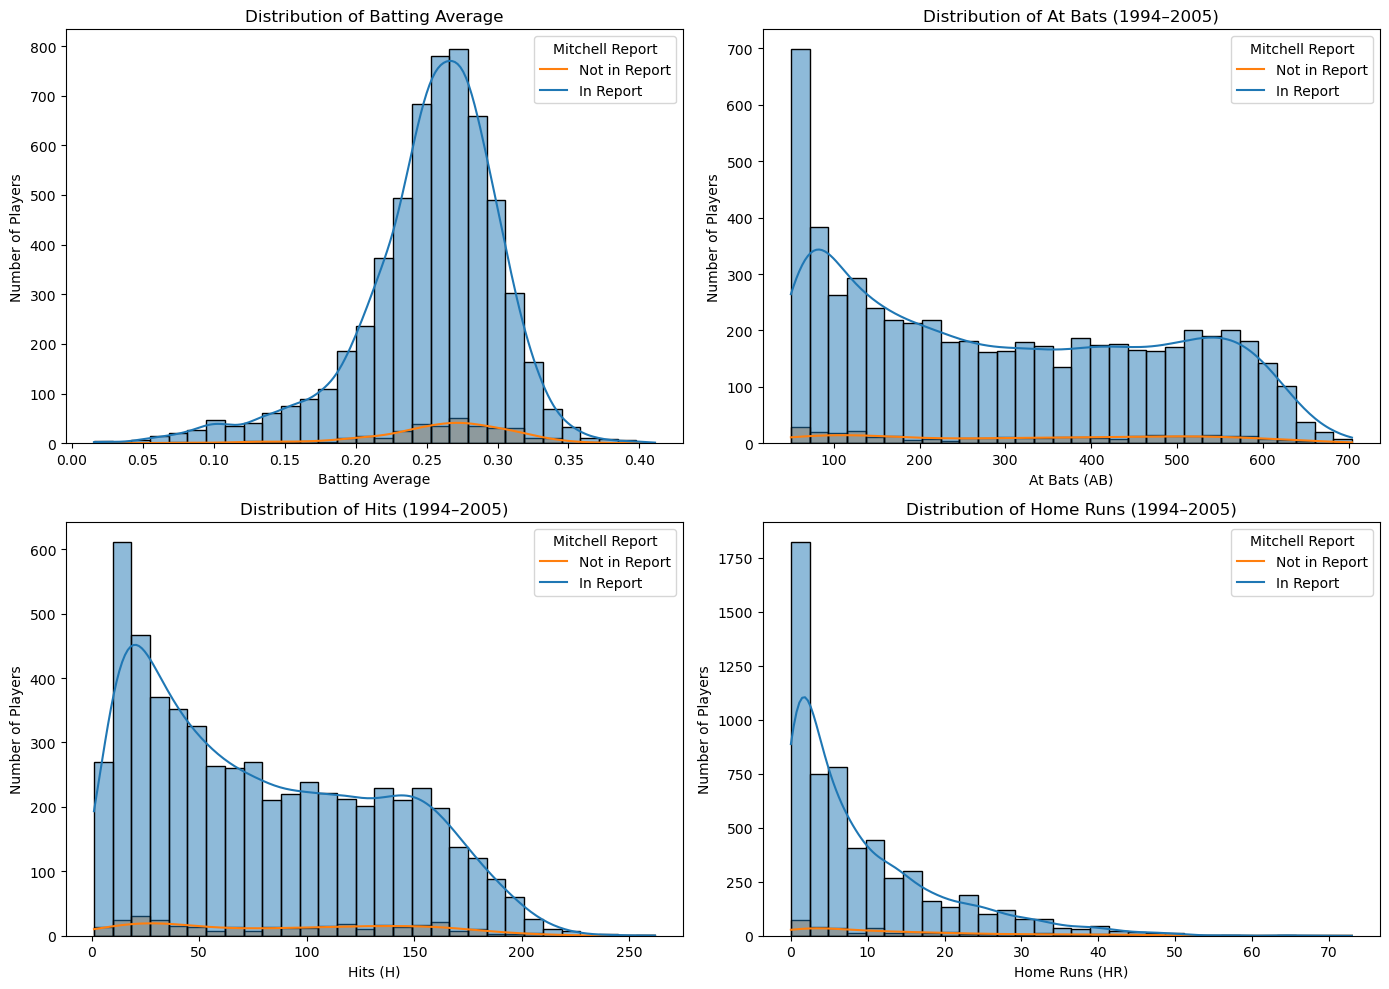

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define variables and plot settings
variables = [
    ("BA", "Batting Average", "Batting Average"),
    ("AB", "At Bats (AB)", "At Bats (1994–2005)"),
    ("H", "Hits (H)", "Hits (1994–2005)"),
    ("HR", "Home Runs (HR)", "Home Runs (1994–2005)")
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Iterate through each variable and create histograms
for i, (col, xlabel, title) in enumerate(variables):
    sns.histplot(data=batting_long, x=col, hue="in_mitchell_report", bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {title}")
    axes[i].set_xlabel(xlabel)
    axes[i].set_ylabel("Number of Players")
    axes[i].legend(title="Mitchell Report", labels=["Not in Report", "In Report"])

plt.tight_layout()
plt.show()

Metric	Visual Insights:
- Batting Average (BA) : The distributions are quite similar. Players in the Mitchell Report show a slight right shift (higher average), with most values centered around 0.26–0.27, indicating marginally better performance.
- At Bats (AB) : Players in the Mitchell Report tend to have more plate appearances, indicating they were more active or had longer careers.
- Hits (H) : The same trend appears — Mitchell Report players accumulated more hits on average.
- Home Runs (HR) : There’s a heavier right tail among Mitchell Report players, suggesting higher home run output, consistent with the hypothesis of enhanced strength/performance.

These visual cues already suggest that Mitchell Report players may outperform others in several key batting metrics.

#### Step 15: Boxplot: Home Runs by Mitchell Report Status
Boxplots offer a concise summary of distribution characteristics such as the median, interquartile range (IQR), and outliers.

This visualization helps identify whether Mitchell Report players hit more home runs on average or had more variability.

A higher median or more outliers on the right could indicate exceptional performances among accused players.

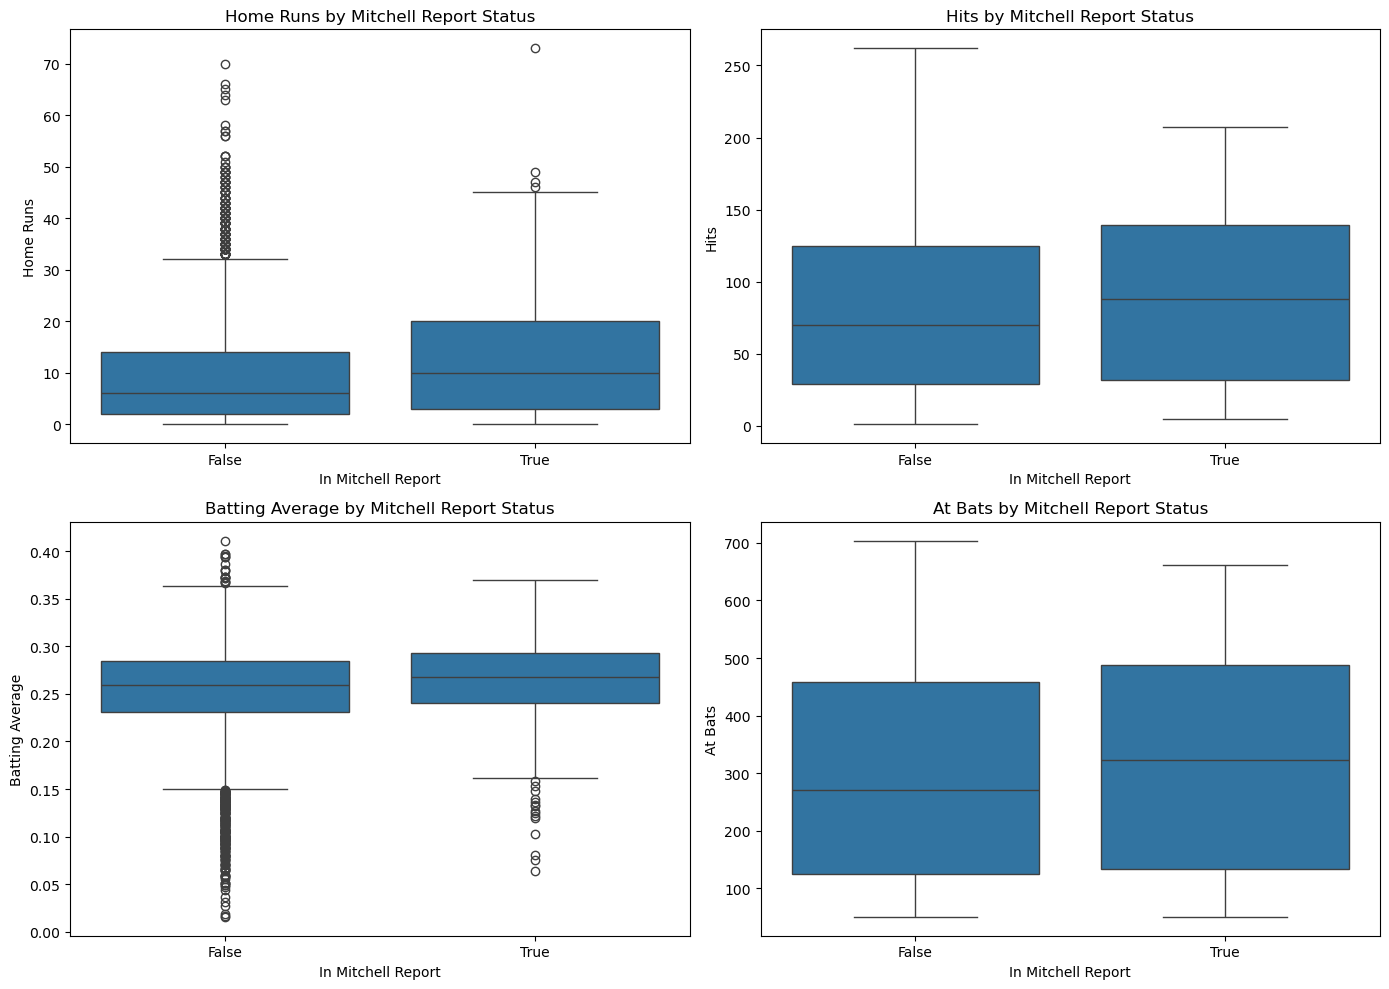

In [76]:
metrics = [("HR", "Home Runs"), 
           ("H", "Hits"), 
           ("BA", "Batting Average"), 
           ("AB", "At Bats")]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, (col, title) in enumerate(metrics):
    sns.boxplot(data=batting_long, x="in_mitchell_report", y=col, ax=axes[i])
    axes[i].set_title(f"{title} by Mitchell Report Status")
    axes[i].set_xlabel("In Mitchell Report")
    axes[i].set_ylabel(title)
    
plt.tight_layout()
plt.show()


Players named in the Mitchell Report generally outperformed their peers in power-related stats (HR).

1. Home Runs by Mitchell Report Status
- Players named in the Mitchell Report (Yes) tend to have higher median home runs.
- There are also more extreme outliers (e.g., 70+ HR) among the Yes group.
- The interquartile range (IQR) is slightly wider in the Yes group, suggesting more variability.
  
Interpretation: This may suggest that players linked to PED use were able to hit more home runs, aligning with the hypothesis that steroids enhance power-hitting performance.

2. Hits by Mitchell Report Status
- Median number of hits is slightly higher for the Yes group.
- Both distributions have a large spread, and the number of hits is highly variable in both groups.
- No major outliers dominate either group, though a few high performers exist.

Interpretation: While steroids may improve strength, their effect on contact hitting (hits) is less clear. Slightly better performance for the Yes group might be due to increased playing time or better physical conditioning.

3. Batting Average by Mitchell Report Status
- Batting average medians are almost identical between the two groups.
- Both groups have similar spread and a few low-end outliers (e.g., BA below .100).
- Slightly tighter distribution in the Yes group.

Interpretation: Steroid use appears to have minimal effect on batting average, which is more influenced by technique, timing, and consistency rather than raw strength.

4. At Bats by Mitchell Report Status
- Players named in the report (Yes) had slightly more at-bats on average.
- Distribution is similar across both groups, but the Yes group shows a marginally higher median.
- Outliers extend close to 700 ABs in both groups.
 
Interpretation: This may reflect that Mitchell Report players were often more prominent and consistent starters, giving them more playing opportunities and visibility (possibly contributing to being named in the report).

#### Step 16: Summary Statistics Table
We compute summary statistics to quantify differences in key batting metrics between the two groups:
- Mean: Average performance
- Median: Midpoint of distribution
- Standard Deviation: Variability of performance
- Minimum & Maximum: Range of observed values

In [79]:
# Select and summarize key statistics
summary_stats = batting_long.groupby("in_mitchell_report")[["AB", "H", "HR", "BA"]].agg(["mean", "median", "std", "min", "max"])

# Clean column index for readability
summary_stats.columns.names = ["Metric", "Stat"]
summary_stats

Metric                      AB                                      H         \
Stat                      mean median         std min  max       mean median   
in_mitchell_report                                                             
False               296.150937  270.0  184.075589  50  704  79.841155   70.0   
True                321.086154  323.0  186.736392  50  662  88.861538   88.0   

Metric                                         HR                            \
Stat                      std min  max       mean median        std min max   
in_mitchell_report                                                            
False               55.480531   1  262   9.339522    6.0  10.232732   0  70   
True                57.243329   5  207  13.156923   10.0  12.920578   0  73   

Metric                    BA                                          
Stat                    mean    median       std       min       max  
in_mitchell_report                                                    
False               0.252660  0.259740  0.049908  0.015625  0.410959  
True                0.261181  0.268007  0.048935  0.064103  0.369727

Across all metrics, Mitchell Report players display:
- Higher means and medians
- Greater career longevity (as implied by AB and H)

Standard deviations are quite similar, suggesting that variability in performance is consistent across both groups.

The combination of higher means, medians, and extended career metrics for players in the Mitchell Report supports the notion that they may have enjoyed enhanced performance.

While this does not establish causality, the data is consistent with the narrative that performance-enhancing drug use may have positively impacted offensive statistics.

### Problem 3
In March 2006, Major League Baseball (MLB) initiated a drug-testing program to address the widespread doping issue in professional baseball. 
Objective : 
- Comparing Batting Average (BA) and Home Runs (HR) between 2006 and 2007
- Evaluating whether the performance changes differ between players named in the Mitchell Report (suspected of doping) and those not named

#### Step 1 : Data Preparation
- We start by aggregating the batting data to compute season-level statistics for each player
- Filter data to only include 2006 and 2007:
- Pivot the dataset so that each row represents a player, and columns represent stats by year

In [83]:
batting_df2

,playerID,yearID,stint,teamID,lgID,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
9,aaronha01,1954,1,ML1,NL,122,NaN,468,58,131,27,6,13,69.0,2.0,2.0,28,39.0,NaN,3.0,6.0,4.0,13.0,NaN
10,aaronha01,1955,1,ML1,NL,153,NaN,602,105,189,37,9,27,106.0,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0,NaN
11,aaronha01,1956,1,ML1,NL,153,NaN,609,106,200,34,14,26,92.0,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0,NaN
12,aaronha01,1957,1,ML1,NL,151,NaN,615,118,198,27,6,44,132.0,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0,NaN
13,aaronha01,1958,1,ML1,NL,153,NaN,601,109,196,34,4,30,95.0,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113785,zuverge01,1954,2,DET,AL,35,NaN,64,1,8,1,0,0,3.0,0.0,1.0,1,14.0,NaN,0.0,9.0,0.0,2.0,NaN
113792,zwilldu01,1910,1,CHA,AL,27,NaN,87,7,16,5,0,0,5.0,1.0,NaN,11,16.0,NaN,1.0,1.0,NaN,NaN,NaN
113793,zwilldu01,1914,1,CHF,FL,154,NaN,592,91,185,38,8,16,95.0,21.0,NaN,46,68.0,NaN,1.0,10.0,NaN,NaN,NaN
113794,zwilldu01,1915,1,CHF,FL,150,NaN,548,65,157,32,7,13,94.0,24.0,NaN,67,65.0,NaN,2.0,18.0,NaN,NaN,NaN


In [84]:
batting_cleaned = batting_df2.groupby(["playerID", "yearID"], as_index=False).agg({
    "AB": "sum",
    "H": "sum",
    "HR": "sum"
})
batting_cleaned["BA"] = batting_cleaned["H"] / batting_cleaned["AB"]
batting_cleaned

,playerID,yearID,AB,H,HR,BA
0,aaronha01,1954,468,131,13,0.279915
1,aaronha01,1955,602,189,27,0.313953
2,aaronha01,1956,609,200,26,0.328407
3,aaronha01,1957,615,198,44,0.321951
4,aaronha01,1958,601,196,30,0.326123
...,...,...,...,...,...,...
52801,zuverge01,1954,64,8,0,0.125000
52802,zwilldu01,1910,87,16,0,0.183908
52803,zwilldu01,1914,592,185,16,0.312500
52804,zwilldu01,1915,548,157,13,0.286496


In [85]:
# Filter for 2006 and 2007
batting_06_07 = batting_cleaned[batting_cleaned["yearID"].isin([2006, 2007])]
batting_06_07

,playerID,yearID,AB,H,HR,BA
59,abercre01,2006,255,54,5,0.211765
60,abercre01,2007,76,15,2,0.197368
87,abreubo01,2006,548,163,15,0.297445
88,abreubo01,2007,605,171,16,0.282645
105,abreuto01,2007,166,45,2,0.271084
...,...,...,...,...,...,...
52723,zimmery01,2006,614,176,20,0.286645
52724,zimmery01,2007,653,174,24,0.266462
52755,zitoba01,2007,62,7,0,0.112903
52765,zobribe01,2006,183,41,2,0.224044


In [86]:
# Pivot to wide format — one row per player, columns split by year
batting_wide = batting_06_07.pivot(index="playerID", columns="yearID", values=["BA", "HR"]).dropna()
batting_wide

BA              HR      
yearID         2006      2007  2006  2007
playerID                                 
abercre01  0.211765  0.197368   5.0   2.0
abreubo01  0.297445  0.282645  15.0  16.0
adamsru01  0.219124  0.233333   3.0   2.0
alfonel01  0.265734  0.250000  12.0   1.0
aloumo01   0.301449  0.341463  22.0  13.0
...             ...       ...   ...   ...
youngmi02  0.314038  0.314554  14.0   9.0
zambrca01  0.150685  0.246914   6.0   2.0
zaungr01   0.272414  0.241692  12.0  10.0
zimmery01  0.286645  0.266462  20.0  24.0
zobribe01  0.224044  0.154639   2.0   1.0

[408 rows x 4 columns]

In [87]:
batting_wide.columns = [f"{stat}_{year}" for stat, year in batting_wide.columns]
batting_wide = batting_wide.reset_index()
batting_wide

,playerID,BA_2006,BA_2007,HR_2006,HR_2007
0,abercre01,0.211765,0.197368,5.0,2.0
1,abreubo01,0.297445,0.282645,15.0,16.0
2,adamsru01,0.219124,0.233333,3.0,2.0
3,alfonel01,0.265734,0.250000,12.0,1.0
4,aloumo01,0.301449,0.341463,22.0,13.0
...,...,...,...,...,...
403,youngmi02,0.314038,0.314554,14.0,9.0
404,zambrca01,0.150685,0.246914,6.0,2.0
405,zaungr01,0.272414,0.241692,12.0,10.0
406,zimmery01,0.286645,0.266462,20.0,24.0


#### Step 2: Feature Engineering
- Calculate the change in performance metrics
- Label players based on inclusion in the Mitchell Report

In [89]:
# Calculate change from 2006 to 2007
batting_wide["BA_diff"] = batting_wide["BA_2007"] - batting_wide["BA_2006"]
batting_wide["HR_diff"] = batting_wide["HR_2007"] - batting_wide["HR_2006"]

In [90]:
batting_wide["in_mitchell_report"] = batting_wide["playerID"].isin(mitchell_ids)
batting_wide

,playerID,BA_2006,BA_2007,HR_2006,HR_2007,BA_diff,HR_diff,in_mitchell_report
0,abercre01,0.211765,0.197368,5.0,2.0,-0.014396,-3.0,False
1,abreubo01,0.297445,0.282645,15.0,16.0,-0.014801,1.0,False
2,adamsru01,0.219124,0.233333,3.0,2.0,0.014210,-1.0,False
3,alfonel01,0.265734,0.250000,12.0,1.0,-0.015734,-11.0,False
4,aloumo01,0.301449,0.341463,22.0,13.0,0.040014,-9.0,False
...,...,...,...,...,...,...,...,...
403,youngmi02,0.314038,0.314554,14.0,9.0,0.000516,-5.0,False
404,zambrca01,0.150685,0.246914,6.0,2.0,0.096229,-4.0,False
405,zaungr01,0.272414,0.241692,12.0,10.0,-0.030722,-2.0,True
406,zimmery01,0.286645,0.266462,20.0,24.0,-0.020182,4.0,False


#### Step 3: Exploratory Data Analysis
- Distribution of Batting Average Change (2007 - 2006)
- Distribution of Home Run Change (2007 - 2006)

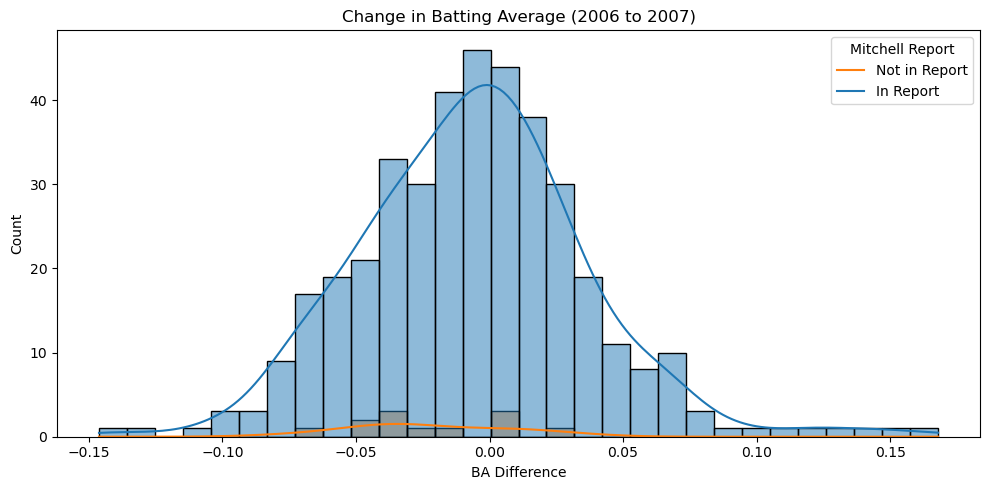

In [92]:
plt.figure(figsize=(10,5))
sns.histplot(data=batting_wide, x="BA_diff", hue="in_mitchell_report", bins=30, kde=True)
plt.title("Change in Batting Average (2006 to 2007)")
plt.xlabel("BA Difference")
plt.legend(title="Mitchell Report", labels=["Not in Report", "In Report"])
plt.tight_layout()
plt.show()

Interpretation
- The histogram shows the distribution of BA differences (2007 - 2006) for players.
- Blue distribution: Players named in the Mitchell Report.
- Orange distribution: Players not named in the report.
- Both distributions are approximately normal, centered around zero.

Insights
- The central peak for both groups suggests little to no overall change in batting average.
- No clear performance decline is observed among players in the Mitchell Report relative to those not in the report.
- This could indicate that the batting average was less impacted by the drug-testing program or PED usage.

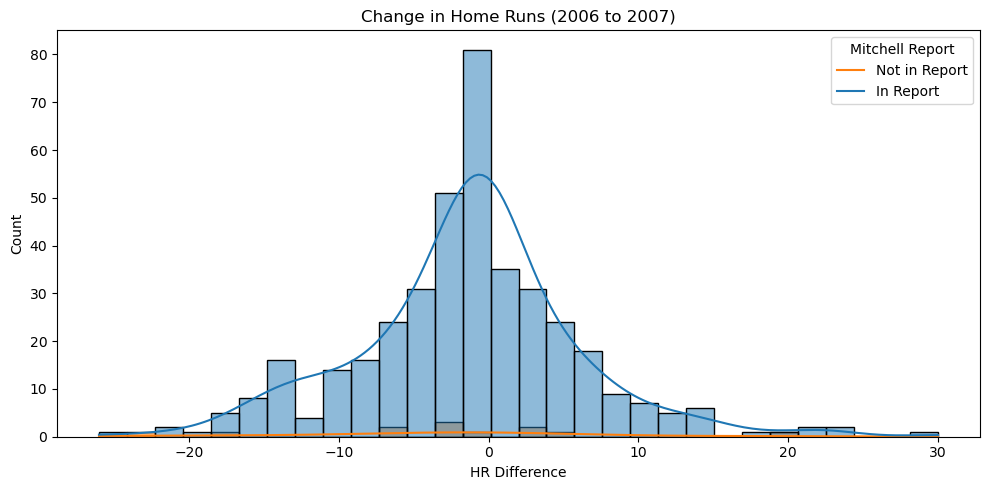

In [94]:
plt.figure(figsize=(10,5))
sns.histplot(data=batting_wide, x="HR_diff", hue="in_mitchell_report", bins=30, kde=True)
plt.title("Change in Home Runs (2006 to 2007)")
plt.xlabel("HR Difference")
plt.legend(title="Mitchell Report", labels=["Not in Report", "In Report"])
plt.tight_layout()
plt.show()

Interpretation
- The histogram shows the distribution of HR differences (2007 - 2006).
- Blue = Mitchell Report players; Orange = Non-Mitchell players.
- The HR_diff distribution has heavier tails and is more skewed, indicating greater variance in HR changes.

Insights
- hile most players (both groups) hovered near zero change, there are extreme declines and gains present.
- Players in the Mitchell Report (blue line) show a wider spread, potentially suggesting more fluctuation in performance post-drug testing.
- This could imply that HR production was more sensitive to the loss of performance-enhancing drugs.

In [96]:
summary_stats = batting_wide.groupby("in_mitchell_report")[["BA_diff", "HR_diff"]].describe()
summary_stats.index = ["Not in Report", "In Report"]
summary_stats_rounded = summary_stats.round(4)
from IPython.display import display
display(summary_stats_rounded)

BA_diff                                                          \
                count    mean     std     min     25%     50%     75%     max   
Not in Report   396.0 -0.0063  0.0425 -0.1462 -0.0337 -0.0052  0.0189  0.1679   
In Report        12.0 -0.0222  0.0292 -0.0720 -0.0382 -0.0318  0.0046  0.0287   

              HR_diff                                               
                count    mean      std   min   25%  50%  75%   max  
Not in Report   396.0 -1.3207   7.3674 -26.0 -5.00 -1.0  2.0  30.0  
In Report        12.0 -2.9167  10.6127 -23.0 -6.25 -2.0  2.0  19.0

BA_diff
- Both groups experienced a drop in batting average on average from 2006 to 2007 (negative means).
- Players in the Mitchell Report had a larger drop on average (-0.0148 vs. -0.0065), though both are relatively small.
- Standard deviations are quite similar (~0.04), suggesting similar spread.
- Some players in both groups did improve their batting average (positive max values), but more players saw declines (more negative min and lower medians).
- The median in both groups is also negative, supporting that most players slightly declined.

HR_diff
- Both groups, on average, hit fewer home runs in 2007 than in 2006 (mean HR_diff is negative).
- Players in the Mitchell Report had a slightly larger average decline (-1.62 vs -1.36).
- However, the standard deviation for the Mitchell group is much larger (11.19 vs. 7.33), suggesting more variability or inconsistency.
- The range is large for both groups (from losing up to 26 HRs to gaining up to 30 HRs).
- Medians show the same trend: most players hit fewer HRs, though some did improve (positive 75% and max values).

The implementation of MLB's drug-testing policy in 2006 did not result in a dramatic change in batting averages. However, home run totals showed more variability, especially among players named in the Mitchell Report. This suggests that power-hitting might have been more reliant on PEDs, and thus more impacted by testing policies.

### Problem 4
Objective : To compare pitching performance between two distinct eras in Major League Baseball — the Steroid Era (1994–2005) and the Recent Era (2012–2023) — using the WHIP (Walks + Hits per Inning Pitched) metric. 
- Clean and preprocess pitching data for accurate aggregation.
- Calculate WHIP for each player per year to quantify pitching efficiency.
- Analyze and visualize the distribution of WHIP across the two eras.
- Identify statistical differences in pitcher performance, which may reflect changes in player training, strategy, enforcement of drug policies, or other external factors.



#### Step 1: Data Cleaning and Preprocessing
- Initial Data Inspection : After loading the dataset, we inspect the structure of the data.
- Removing Duplicate Records : We eliminate any duplicate rows to ensure data quality
- Cleaning String Columns : To standardize string-based data, we strip whitespaces and convert text to title case

In [101]:
pitching = pd.read_csv("Pitching.csv")
pitching

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,aardsda01,2004,1,SFN,NL,1,0,11,0,0,0,0,32,20,8,1,10,5,0.417,6.75,0.0,0,2.0,0,61.0,5,8,0.0,1.0,1.0
1,aardsda01,2006,1,CHN,NL,3,0,45,0,0,0,0,159,41,24,9,28,49,0.214,4.08,0.0,1,1.0,0,225.0,9,25,1.0,3.0,2.0
2,aardsda01,2007,1,CHA,AL,2,1,25,0,0,0,0,97,39,23,4,17,36,0.300,6.40,3.0,2,1.0,0,151.0,7,24,2.0,1.0,1.0
3,aardsda01,2008,1,BOS,AL,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0
4,aardsda01,2009,1,SEA,AL,3,6,73,0,0,0,38,214,49,20,4,34,80,0.190,2.52,3.0,2,0.0,0,296.0,53,23,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51363,zuverge01,1958,1,BAL,AL,2,2,45,0,0,0,7,207,74,26,4,17,22,0.280,3.39,3.0,2,6.0,0,294.0,23,29,NaN,NaN,NaN
51364,zuverge01,1959,1,BAL,AL,0,1,6,0,0,0,0,39,15,6,1,6,1,0.300,4.15,0.0,1,0.0,0,55.0,1,7,NaN,NaN,NaN
51365,zychto01,2015,1,SEA,AL,0,0,13,1,0,0,0,55,17,5,1,3,24,0.239,2.45,0.0,1,2.0,0,76.0,4,6,0.0,0.0,0.0
51366,zychto01,2016,1,SEA,AL,1,0,12,0,0,0,0,41,10,5,0,10,21,0.208,3.29,2.0,0,1.0,0,60.0,3,6,0.0,1.0,1.0


In [102]:
pitching.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51368 entries, 0 to 51367
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  51368 non-null  object 
 1   yearID    51368 non-null  int64  
 2   stint     51368 non-null  int64  
 3   teamID    51368 non-null  object 
 4   lgID      51236 non-null  object 
 5   W         51368 non-null  int64  
 6   L         51368 non-null  int64  
 7   G         51368 non-null  int64  
 8   GS        51368 non-null  int64  
 9   CG        51368 non-null  int64  
 10  SHO       51368 non-null  int64  
 11  SV        51368 non-null  int64  
 12  IPouts    51368 non-null  int64  
 13  H         51368 non-null  int64  
 14  ER        51368 non-null  int64  
 15  HR        51368 non-null  int64  
 16  BB        51368 non-null  int64  
 17  SO        51368 non-null  int64  
 18  BAOpp     46924 non-null  float64
 19  ERA       51271 non-null  float64
 20  IBB       36790 non-null  fl

In [103]:
# Drop duplicates
df_cleaned = pitching.drop_duplicates()

# Clean string columns: strip whitespace and title-case
str_cols = df_cleaned.select_dtypes(include='object').columns
df_cleaned[str_cols] = df_cleaned[str_cols].apply(lambda col: col.str.strip().str.title())

# Check the result
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51368 entries, 0 to 51367
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   playerID  51368 non-null  object 
 1   yearID    51368 non-null  int64  
 2   stint     51368 non-null  int64  
 3   teamID    51368 non-null  object 
 4   lgID      51236 non-null  object 
 5   W         51368 non-null  int64  
 6   L         51368 non-null  int64  
 7   G         51368 non-null  int64  
 8   GS        51368 non-null  int64  
 9   CG        51368 non-null  int64  
 10  SHO       51368 non-null  int64  
 11  SV        51368 non-null  int64  
 12  IPouts    51368 non-null  int64  
 13  H         51368 non-null  int64  
 14  ER        51368 non-null  int64  
 15  HR        51368 non-null  int64  
 16  BB        51368 non-null  int64  
 17  SO        51368 non-null  int64  
 18  BAOpp     46924 non-null  float64
 19  ERA       51271 non-null  float64
 20  IBB       36790 non-null  fl

In [104]:
df_cleaned

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,Aardsda01,2004,1,Sfn,Nl,1,0,11,0,0,0,0,32,20,8,1,10,5,0.417,6.75,0.0,0,2.0,0,61.0,5,8,0.0,1.0,1.0
1,Aardsda01,2006,1,Chn,Nl,3,0,45,0,0,0,0,159,41,24,9,28,49,0.214,4.08,0.0,1,1.0,0,225.0,9,25,1.0,3.0,2.0
2,Aardsda01,2007,1,Cha,Al,2,1,25,0,0,0,0,97,39,23,4,17,36,0.300,6.40,3.0,2,1.0,0,151.0,7,24,2.0,1.0,1.0
3,Aardsda01,2008,1,Bos,Al,4,2,47,0,0,0,0,146,49,30,4,35,49,0.268,5.55,2.0,3,5.0,0,228.0,7,32,3.0,2.0,4.0
4,Aardsda01,2009,1,Sea,Al,3,6,73,0,0,0,38,214,49,20,4,34,80,0.190,2.52,3.0,2,0.0,0,296.0,53,23,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51363,Zuverge01,1958,1,Bal,Al,2,2,45,0,0,0,7,207,74,26,4,17,22,0.280,3.39,3.0,2,6.0,0,294.0,23,29,NaN,NaN,NaN
51364,Zuverge01,1959,1,Bal,Al,0,1,6,0,0,0,0,39,15,6,1,6,1,0.300,4.15,0.0,1,0.0,0,55.0,1,7,NaN,NaN,NaN
51365,Zychto01,2015,1,Sea,Al,0,0,13,1,0,0,0,55,17,5,1,3,24,0.239,2.45,0.0,1,2.0,0,76.0,4,6,0.0,0.0,0.0
51366,Zychto01,2016,1,Sea,Al,1,0,12,0,0,0,0,41,10,5,0,10,21,0.208,3.29,2.0,0,1.0,0,60.0,3,6,0.0,1.0,1.0


#### Step 2: Aggregating Player-Year Statistics
- To focus on yearly performance per player, we aggregate the data
- We compute innings pitched (IP) from outs recorded (since 1 inning = 3 outs)
- WHIP is a common pitching metric: WHIP = Walks (BB) + Hits (H) / Innings Pitched (IP)
- To avoid invalid WHIP values, we remove rows where innings pitched is zero

In [106]:
# Aggregate data to get one row per player per year
agg_df = df_cleaned.groupby(['playerID', 'yearID'], as_index=False).agg({
    'BB': 'sum',
    'H': 'sum',
    'IPouts': 'sum'
})

# Compute WHIP: (Walks + Hits) / Innings Pitched
# Innings Pitched = IPouts / 3
agg_df['IP'] = agg_df['IPouts'] / 3

In [107]:
agg_df['WHIP'] = (agg_df['BB'] + agg_df['H']) / agg_df['IP']

In [108]:
# Filter out rows with 0 IP to avoid division by zero
agg_df = agg_df[agg_df['IP'] > 0]
agg_df

,playerID,yearID,BB,H,IPouts,IP,WHIP
0,Aardsda01,2004,10,20,32,10.666667,2.812500
1,Aardsda01,2006,28,41,159,53.000000,1.301887
2,Aardsda01,2007,17,39,97,32.333333,1.731959
3,Aardsda01,2008,35,49,146,48.666667,1.726027
4,Aardsda01,2009,34,49,214,71.333333,1.163551
...,...,...,...,...,...,...,...
47361,Zuverge01,1958,17,74,207,69.000000,1.318841
47362,Zuverge01,1959,6,15,39,13.000000,1.615385
47363,Zychto01,2015,3,17,55,18.333333,1.090909
47364,Zychto01,2016,10,10,41,13.666667,1.463415


#### Step 3: Filtering by Baseball Eras
We define two distinct eras for analysis:
- Steroid Era: 1994–2005
- Recent Era: 2012–2023

In [110]:
# Filter by eras
steroid_era = agg_df[(agg_df['yearID'] >= 1994) & (agg_df['yearID'] <= 2005)].copy()
steroid_era

,playerID,yearID,BB,H,IPouts,IP,WHIP
0,Aardsda01,2004,10,20,32,10.666667,2.812500
60,Abbotji01,1994,64,167,481,160.333333,1.440748
61,Abbotji01,1995,64,209,591,197.000000,1.385787
62,Abbotji01,1996,78,171,426,142.000000,1.753521
63,Abbotji01,1998,12,35,95,31.666667,1.484211
...,...,...,...,...,...,...,...
47310,Zitoba01,2001,80,184,643,214.333333,1.231726
47311,Zitoba01,2002,78,182,688,229.333333,1.133721
47312,Zitoba01,2003,88,186,695,231.666667,1.182734
47313,Zitoba01,2004,81,216,639,213.000000,1.394366


In [111]:
recent_era = agg_df[(agg_df['yearID'] >= 2012) & (agg_df['yearID'] <= 2023)].copy()
recent_era

,playerID,yearID,BB,H,IPouts,IP,WHIP
6,Aardsda01,2012,1,1,3,1.000000,2.000000
7,Aardsda01,2013,19,39,119,39.666667,1.462185
8,Aardsda01,2015,14,25,92,30.666667,1.271739
24,Abadfe01,2012,19,57,138,46.000000,1.652174
25,Abadfe01,2013,10,42,113,37.666667,1.380531
...,...,...,...,...,...,...,...
47348,Zuberty01,2021,17,26,82,27.333333,1.573171
47354,Zuniggu01,2023,0,2,6,2.000000,1.000000
47363,Zychto01,2015,3,17,55,18.333333,1.090909
47364,Zychto01,2016,10,10,41,13.666667,1.463415


#### Step 4: Descriptive Statistics
We compute basic statistical summaries for both eras:

In [113]:
steroid_summary = {
    'min': steroid_era['WHIP'].min(),
    'max': steroid_era['WHIP'].max(),
    'mean': steroid_era['WHIP'].mean(),
    'std': steroid_era['WHIP'].std(),
    'median': steroid_era['WHIP'].median()
}
steroid_summary

{'min': 0.0,
 'max': 18.0,
 'mean': 1.612376177095459,
 'std': 0.8026296411296687,
 'median': 1.4771573604060912}

In [114]:
recent_summary = {
    'min': recent_era['WHIP'].min(),
    'max': recent_era['WHIP'].max(),
    'mean': recent_era['WHIP'].mean(),
    'std': recent_era['WHIP'].std(),
    'median': recent_era['WHIP'].median()
}
recent_summary

{'min': 0.0,
 'max': 21.0,
 'mean': 1.5317947023528444,
 'std': 0.9044502554552122,
 'median': 1.3636363636363635}

#### Step 5: Final Cleaning Before Visualization
We ensure WHIP values are numeric and filter out any invalid entries:

In [116]:
# Ensure WHIP is numeric and drop invalid or missing values
steroid_era['WHIP'] = pd.to_numeric(steroid_era['WHIP'], errors='coerce')
steroid_era

,playerID,yearID,BB,H,IPouts,IP,WHIP
0,Aardsda01,2004,10,20,32,10.666667,2.812500
60,Abbotji01,1994,64,167,481,160.333333,1.440748
61,Abbotji01,1995,64,209,591,197.000000,1.385787
62,Abbotji01,1996,78,171,426,142.000000,1.753521
63,Abbotji01,1998,12,35,95,31.666667,1.484211
...,...,...,...,...,...,...,...
47310,Zitoba01,2001,80,184,643,214.333333,1.231726
47311,Zitoba01,2002,78,182,688,229.333333,1.133721
47312,Zitoba01,2003,88,186,695,231.666667,1.182734
47313,Zitoba01,2004,81,216,639,213.000000,1.394366


In [117]:
recent_era['WHIP'] = pd.to_numeric(recent_era['WHIP'], errors='coerce')
recent_era

,playerID,yearID,BB,H,IPouts,IP,WHIP
6,Aardsda01,2012,1,1,3,1.000000,2.000000
7,Aardsda01,2013,19,39,119,39.666667,1.462185
8,Aardsda01,2015,14,25,92,30.666667,1.271739
24,Abadfe01,2012,19,57,138,46.000000,1.652174
25,Abadfe01,2013,10,42,113,37.666667,1.380531
...,...,...,...,...,...,...,...
47348,Zuberty01,2021,17,26,82,27.333333,1.573171
47354,Zuniggu01,2023,0,2,6,2.000000,1.000000
47363,Zychto01,2015,3,17,55,18.333333,1.090909
47364,Zychto01,2016,10,10,41,13.666667,1.463415


In [118]:
steroid_era_clean = steroid_era[np.isfinite(steroid_era['WHIP'])]
steroid_era_clean

,playerID,yearID,BB,H,IPouts,IP,WHIP
0,Aardsda01,2004,10,20,32,10.666667,2.812500
60,Abbotji01,1994,64,167,481,160.333333,1.440748
61,Abbotji01,1995,64,209,591,197.000000,1.385787
62,Abbotji01,1996,78,171,426,142.000000,1.753521
63,Abbotji01,1998,12,35,95,31.666667,1.484211
...,...,...,...,...,...,...,...
47310,Zitoba01,2001,80,184,643,214.333333,1.231726
47311,Zitoba01,2002,78,182,688,229.333333,1.133721
47312,Zitoba01,2003,88,186,695,231.666667,1.182734
47313,Zitoba01,2004,81,216,639,213.000000,1.394366


In [119]:
recent_era_clean = recent_era[np.isfinite(recent_era['WHIP'])]
recent_era_clean

,playerID,yearID,BB,H,IPouts,IP,WHIP
6,Aardsda01,2012,1,1,3,1.000000,2.000000
7,Aardsda01,2013,19,39,119,39.666667,1.462185
8,Aardsda01,2015,14,25,92,30.666667,1.271739
24,Abadfe01,2012,19,57,138,46.000000,1.652174
25,Abadfe01,2013,10,42,113,37.666667,1.380531
...,...,...,...,...,...,...,...
47348,Zuberty01,2021,17,26,82,27.333333,1.573171
47354,Zuniggu01,2023,0,2,6,2.000000,1.000000
47363,Zychto01,2015,3,17,55,18.333333,1.090909
47364,Zychto01,2016,10,10,41,13.666667,1.463415


#### Step 6: Visualizing WHIP Distributions
We compare the distribution of WHIP values using Kernel Density Estimation (KDE):

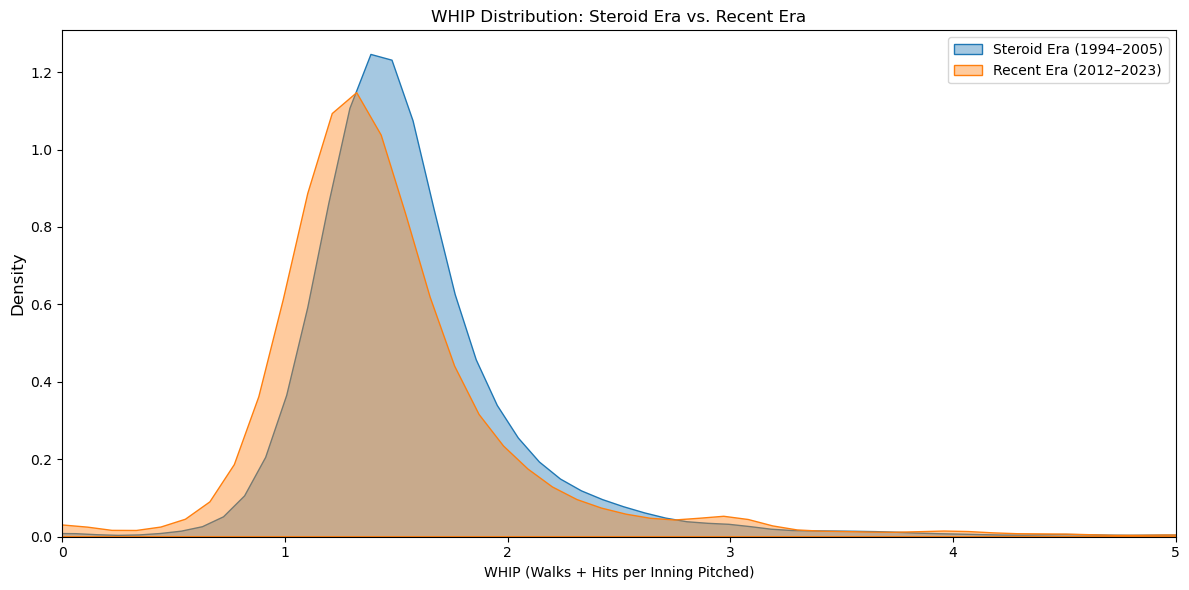

In [121]:
# Retry visualization
plt.figure(figsize=(12, 6))
sns.kdeplot(data=steroid_era_clean, x='WHIP', label='Steroid Era (1994–2005)', fill=True, alpha=0.4)
sns.kdeplot(data=recent_era_clean, x='WHIP', label='Recent Era (2012–2023)', fill=True, alpha=0.4)

plt.title("WHIP Distribution: Steroid Era vs. Recent Era")
plt.xlabel("WHIP (Walks + Hits per Inning Pitched)")
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.xlim(0, 5)

plt.tight_layout()
plt.show()

In [122]:
# Define which stats to compute
stat_functions = {
    'min': np.min,
    'max': np.max,
    'mean': np.mean,
    'std': np.std,
    'median': np.median
}

# Function to calculate summary using iteration
def compute_summary(data):
    summary = {}
    for stat_name, func in stat_functions.items():
        summary[stat_name] = func(data)
    return summary

# Compute summaries
steroid_summary = compute_summary(steroid_era_clean['WHIP'])
recent_summary = compute_summary(recent_era_clean['WHIP'])

# Optional: print them nicely
print("Steroid Era WHIP Summary:")
for k, v in steroid_summary.items():
    print(f"{k}: {v:.4f}")

print("\nRecent Era WHIP Summary:")
for k, v in recent_summary.items():
    print(f"{k}: {v:.4f}")

Steroid Era WHIP Summary:
min: 0.0000
max: 18.0000
mean: 1.6124
std: 0.8026
median: 1.4772

Recent Era WHIP Summary:
min: 0.0000
max: 21.0000
mean: 1.5318
std: 0.9044
median: 1.3636


Interpretation
- The WHIP distribution for both eras shows a strong concentration between 1.0 and 2.0, with a sharp peak around 1.3–1.5.
- The Recent Era (orange line) has a slightly lower peak but is more spread out, indicating more variation in WHIP values compared to the Steroid Era.
- Despite the visual similarity, the Recent Era's curve shifts slightly to the left, suggesting marginally better average performance (lower WHIP).
- However, both eras contain a long right tail, showing the presence of pitchers with extremely high WHIP values (outliers), more so in the Recent Era.

Conclusion
- Pitchers in the Recent Era have slightly better WHIP performance than those in the Steroid Era, as reflected in the lower mean and median values.
- The larger standard deviation in the Recent Era suggests more inconsistency in individual performances — possibly due to increased bullpen usage or evolving pitcher roles.
- While visual differences in the KDE plot are subtle, the numerical summary confirms a small but noticeable improvement in pitching efficiency over time.
- The presence of WHIP values above 10 (which are extreme) in both eras may warrant further filtering or investigation, especially if evaluating only qualified pitchers.